<a href="https://colab.research.google.com/github/mark-polo/machine-learning/blob/main/spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
test_size = 0.3
random_state = 42

In [ ]:
df = pd.read_csv("/songs_normalize.csv")

In [ ]:
columns = df.columns

columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [ ]:
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


## EDA

In [ ]:
df.isna().mean()

artist              0.0
song                0.0
duration_ms         0.0
explicit            0.0
year                0.0
popularity          0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
genre               0.0
dtype: float64

In [ ]:
d = df.groupby("duration_ms")["mode"].agg(["count", "mean"])

In [ ]:
d.sort_values("count", ascending=False).head(10)

,count,mean
duration_ms,,
212106,4,1.000000
229080,3,0.000000
185586,3,0.333333
236133,3,0.000000
202066,3,0.666667
222653,3,0.333333
249533,3,0.333333
257200,3,1.000000
199480,3,1.000000


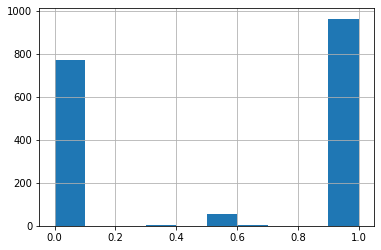

In [ ]:
df.groupby("duration_ms")["mode"].mean().hist()

In [ ]:
df.groupby("year")["mode"].agg(["count", "mean"])

,count,mean
year,,
1998,1,1.000000
1999,38,0.552632
2000,74,0.540541
2001,108,0.518519
2002,90,0.511111
2003,97,0.556701
2004,96,0.541667
2005,104,0.548077
2006,95,0.663158


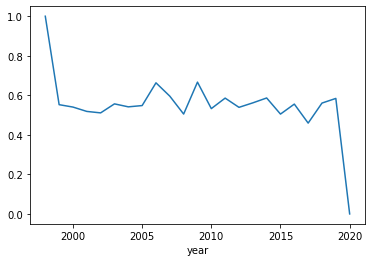

In [ ]:
df.groupby("year")["mode"].mean().plot()

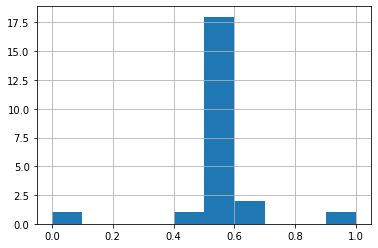

In [ ]:
df.groupby("year")["mode"].mean().hist()

In [ ]:
p = df.groupby("popularity")["mode"].agg(["count", "mean"])

In [ ]:
p.sort_values("count", ascending=False).head(10)

,count,mean
popularity,,
0,126,0.587302
69,76,0.486842
68,75,0.666667
74,69,0.492754
73,69,0.521739
67,66,0.500000
76,64,0.531250
64,63,0.666667
63,62,0.548387


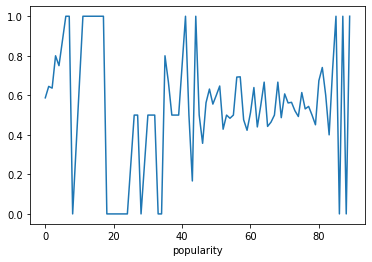

In [ ]:
df.groupby("popularity")["mode"].mean().plot()

In [ ]:
t = df.groupby("danceability")["mode"].agg(["count", "mean"])

In [ ]:
t.sort_values("count", ascending=False).head(10)

,count,mean
danceability,,
0.736,12,0.666667
0.688,12,0.666667
0.682,11,0.636364
0.791,11,0.090909
0.687,11,0.636364
0.760,10,0.600000
0.733,10,0.500000
0.713,10,0.600000
0.794,10,0.400000


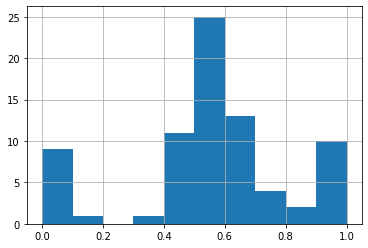

In [ ]:
df.groupby("popularity")["mode"].mean().hist()

In [ ]:
l = df.groupby("loudness")["mode"].agg(["count", "mean"])

In [ ]:
l.sort_values("count", ascending=False).head(10)

,count,mean
loudness,,
-6.366,5,0.400000
-5.153,4,1.000000
-3.782,4,0.000000
-5.595,4,1.000000
-5.346,3,0.000000
-4.699,3,0.333333
-5.881,3,0.000000
-5.520,3,0.333333
-5.870,3,0.333333


In [ ]:
df["loudness"].agg(["min", "max"])

min   -20.514
max    -0.276
Name: loudness, dtype: float64

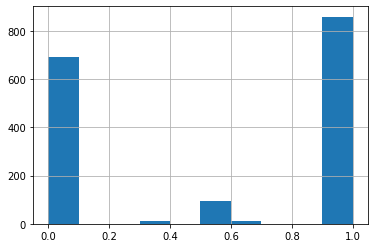

In [ ]:
df.groupby("loudness")["mode"].mean().hist()

In [ ]:
tempo = df.groupby("loudness")["mode"].agg(["count", "mean"])

In [ ]:
tempo.sort_values("count", ascending=False).head(10)

,count,mean
loudness,,
-6.366,5,0.400000
-5.153,4,1.000000
-3.782,4,0.000000
-5.595,4,1.000000
-5.346,3,0.000000
-4.699,3,0.333333
-5.881,3,0.000000
-5.520,3,0.333333
-5.870,3,0.333333


In [ ]:
df["loudness_bin"] = pd.qcut(df["loudness"], 5)

In [ ]:
df.groupby("loudness_bin")["mode"].agg(["count", "mean"])

,count,mean
loudness_bin,,
"(-20.515, -6.825]",401,0.583541
"(-6.825, -5.737]",399,0.538847
"(-5.737, -4.886]",400,0.555000
"(-4.886, -3.951]",400,0.565000
"(-3.951, -0.276]",400,0.525000


In [ ]:
df["danceability_bin"] = pd.qcut(df["danceability"], 5)

In [ ]:
df.groupby("danceability_bin")["mode"].agg(["count", "mean"])

,count,mean
danceability_bin,,
"(0.128, 0.554]",402,0.621891
"(0.554, 0.645]",402,0.564677
"(0.645, 0.71]",398,0.545226
"(0.71, 0.788]",398,0.532663
"(0.788, 0.975]",400,0.502500


In [ ]:
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,251,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,201,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,201,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [ ]:
df["duration_ms"] = df["duration_ms"].apply(lambda x : round(x/1000))

In [ ]:
df['artist_num'] = df[['artist']].apply(lambda x: pd.factorize(x)[0])
df['song_num'] = df[['song']].apply(lambda x: pd.factorize(x)[0])
df['genre_num'] = df[['genre']].apply(lambda x: pd.factorize(x)[0])
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,artist_num,song_num,genre_num
0,Britney Spears,Oops!...I Did It Again,211,False,2000,77,0.751,0.834,1,-5.444,...,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,0,0,0
1,blink-182,All The Small Things,167,False,1999,79,0.434,0.897,0,-4.918,...,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",1,1,1
2,Faith Hill,Breathe,251,False,1999,66,0.529,0.496,7,-9.007,...,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",2,2,2
3,Bon Jovi,It's My Life,224,False,2000,78,0.551,0.913,0,-4.063,...,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",3,3,3
4,*NSYNC,Bye Bye Bye,201,False,2000,65,0.614,0.928,8,-4.806,...,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,4,4,0


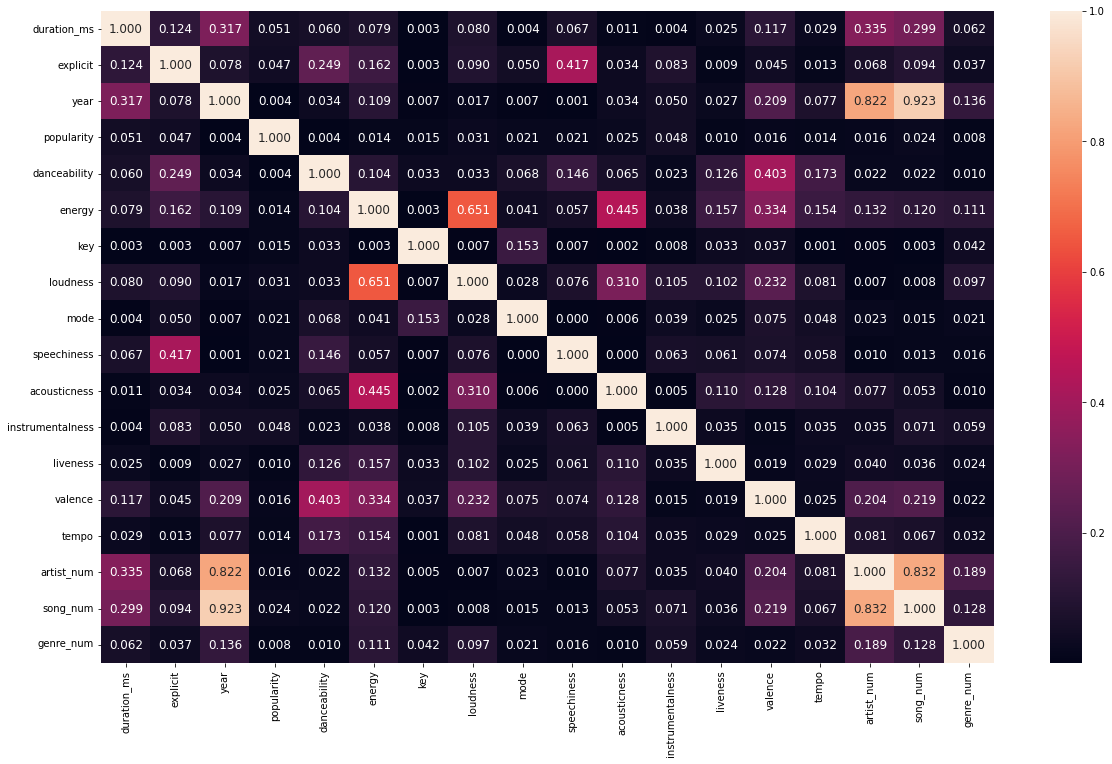

In [ ]:
matrix_corr = df.corr().abs()
ax = plt.subplots(figsize=[20,12])
ax = sns.heatmap(matrix_corr, annot=True, annot_kws={"size": 12}, fmt='.3f')

## Preprocesing data

In [ ]:
X = df.drop(['artist', 'song', 'genre', 'mode'], axis=1)
Y = df["mode"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
feature_scaled = scaler.transform(X)
feature_scaled = pd.DataFrame(feature_scaled, columns = X.columns)
feature_scaled = feature_scaled.drop(columns=['song_num', 'year'])
feature_scaled.head()

,duration_ms,explicit,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_num,genre_num
0,-0.453458,-0.616654,0.802968,0.595254,0.744130,-1.211348,0.035403,-0.622748,0.986974,-0.173316,1.235719,1.550256,-0.929867,-1.597907,-0.873867
1,-1.577681,-0.616654,0.896731,-1.662882,1.156685,-1.488038,0.307519,-0.569697,-0.684669,-0.173518,3.063158,0.599207,1.060944,-1.593589,-0.784230
2,0.568563,-0.616654,0.287268,-0.986153,-1.469257,0.448791,-1.807847,-0.775658,0.254151,-0.173518,0.496211,-1.239486,0.620779,-1.589271,-0.694594
3,-0.121301,-0.616654,0.849850,-0.829437,1.261461,-1.488038,0.749837,-0.592582,-0.592345,-0.173364,1.178834,-0.034825,-0.004843,-1.584953,-0.604957
4,-0.708963,-0.616654,0.240386,-0.380660,1.359688,0.725481,0.365460,-0.540572,-0.508676,-0.161666,-0.687713,1.482324,1.948543,-1.580635,-0.873867


In [ ]:
x_train , x_test, y_train, y_test = train_test_split(feature_scaled, Y, test_size=test_size, random_state=random_state)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

"""
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
        bc = Blitz(x_train, x_test, y_train, y_test, 200, 10)
        
        print(bc.testing_models("accuracy"))
"""


class Blitz:
    def __init__(self, X_train, X_test, Y_train, Y_test, n_estimator, num_folds):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        self.n_estimator = n_estimator
        self.num_folds = num_folds
        # self.seed = seed

    def testing_models(self, scoring):
        models = [('LR', LogisticRegression()),
                  ('LDA', LinearDiscriminantAnalysis()),
                  ('KNN', KNeighborsClassifier()),
                  ('CART', DecisionTreeClassifier()),
                  ('NB', GaussianNB()),
                  ('LSVC', LinearSVC()),
                  ('SVC', SVC()),
                  ('MLP', MLPClassifier()),
                  ('BG', BaggingClassifier(n_estimators=self.n_estimator)),
                  ('RF', RandomForestClassifier(n_estimators=self.n_estimator)),
                  ('ET', ExtraTreesClassifier(n_estimators=self.n_estimator)),
                  ('AB', AdaBoostClassifier(n_estimators=self.n_estimator, algorithm='SAMME')),
                  ('GB', GradientBoostingClassifier(n_estimators=self.n_estimator))]

        scores = []
        names = []
        results = []
        predictions = []
        msg_row = []
        for name, model in models:
            kfold = KFold(n_splits=self.num_folds)
            cv_results = cross_val_score(model, self.X_train, self.Y_train, cv=kfold, scoring=scoring)
            names.append(name)
            results.append(cv_results)
            model.fit(self.X_train, self.Y_train)
            m_predict = model.predict(self.X_test)
            predictions.append(m_predict)
            m_score = model.score(self.X_test, self.Y_test)
            scores.append(m_score)
            msg = "%s: train = %.3f (%.3f) / test = %.3f" % (name, cv_results.mean(), cv_results.std(), m_score)
            msg_row.append(msg)
            print(msg)


In [ ]:
bc = Blitz(x_train, x_test, y_train, y_test, 100, 10)
        
bc.testing_models("roc_auc")

LR: train = 0.598 (0.068) / test = 0.585
LDA: train = 0.598 (0.068) / test = 0.585
KNN: train = 0.536 (0.032) / test = 0.578
CART: train = 0.552 (0.023) / test = 0.570
NB: train = 0.577 (0.053) / test = 0.568


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

LSVC: train = 0.598 (0.068) / test = 0.587
SVC: train = 0.589 (0.057) / test = 0.587


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

MLP: train = 0.559 (0.047) / test = 0.565
BG: train = 0.672 (0.039) / test = 0.612
RF: train = 0.662 (0.046) / test = 0.602
ET: train = 0.664 (0.040) / test = 0.632
AB: train = 0.645 (0.042) / test = 0.610
GB: train = 0.659 (0.048) / test = 0.633
